find the data description here: https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey

Based on the proposed research question, the target variable will be [leave] which represents how easy it is to take a leave for mental health reasons in a tech company.

In [2]:
import pandas as pd

df = pd.read_csv('data/survey.csv')

print(df.head())
print(df.shape)

             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1 

In [24]:
#Type of each col
for col_name, dtype in df.dtypes.to_dict().items():
    print(col_name + ": " + str(dtype))

Timestamp: object
Age: int64
Gender: object
Country: object
state: object
self_employed: object
family_history: object
treatment: object
work_interfere: object
no_employees: object
remote_work: object
tech_company: object
benefits: object
care_options: object
wellness_program: object
seek_help: object
anonymity: object
leave: object
mental_health_consequence: object
phys_health_consequence: object
coworkers: object
supervisor: object
mental_health_interview: object
phys_health_interview: object
mental_vs_physical: object
obs_consequence: object
comments: object


Note that age is the only continuous variable in this data set

In [11]:
#target variable
df['leave'].describe()

count           1259
unique             5
top       Don't know
freq             563
Name: leave, dtype: object

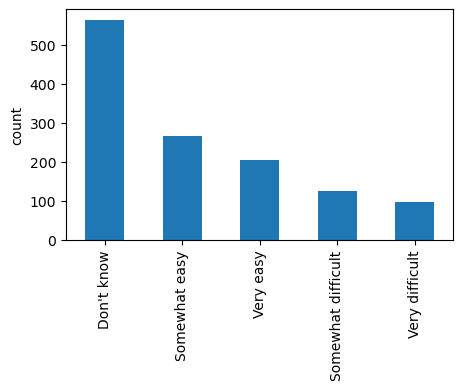

In [4]:
import numpy as np
import matplotlib
from matplotlib import pylab as plt

#bar graph for target variable
plt.figure(figsize=(5,3))
pd.value_counts(df['leave']).plot.bar()
plt.ylabel('count')
plt.show()

For people who answered Don't know, what are the correlation between their answer and their take on if discussing a mental health issue with employer would have negative consequences.

In [14]:
dont_know = df[df['leave']=='Don\'t know']
dont_know['mental_health_consequence'].describe()

count       563
unique        3
top       Maybe
freq        262
Name: mental_health_consequence, dtype: object

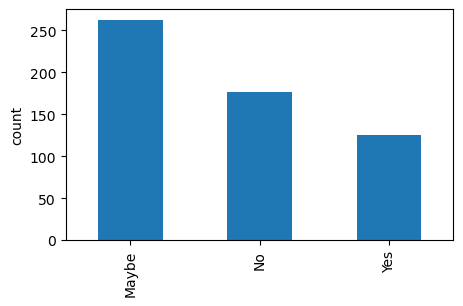

In [15]:
#distribution of take on mental_health_concequence for people answered don't know to if taking a leave is easy
plt.figure(figsize=(5,3))
pd.value_counts(dont_know['mental_health_consequence']).plot.bar()
plt.ylabel('count')
plt.show()

mental_health_consequence     Maybe        No       Yes
leave                                                  
Don't know                 0.465364  0.312611  0.222025
Somewhat difficult         0.293651  0.277778  0.428571
Somewhat easy              0.394737  0.477444  0.127820
Very difficult             0.265306  0.112245  0.622449
Very easy                  0.228155  0.684466  0.087379


<Figure size 500x300 with 0 Axes>

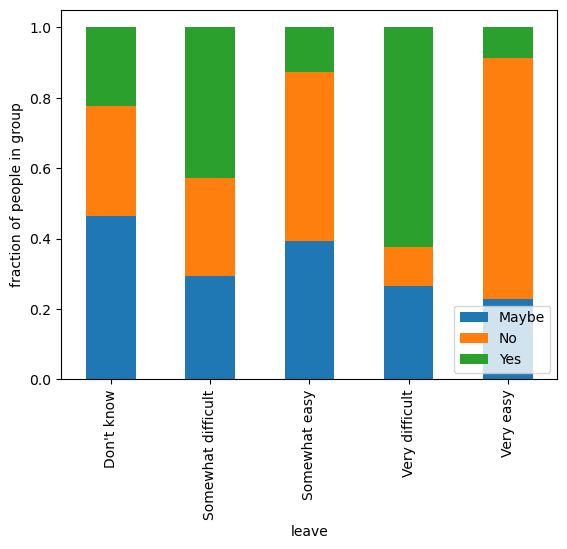

In [5]:
#correlation between mental_health_consequence and leave
count_matrix = df.groupby(['leave', 'mental_health_consequence']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

plt.figure(figsize=(5,3))
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()

count    1.259000e+03
mean     7.942815e+07
std      2.818299e+09
min     -1.726000e+03
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: Age, dtype: float64


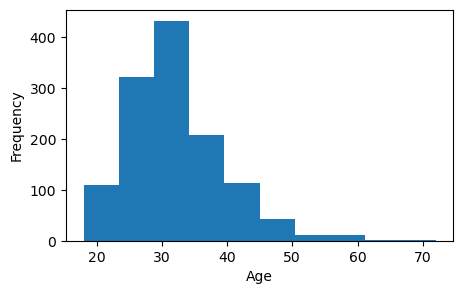

In [6]:
#distribution of age in the survey population
print(df['Age'].describe())

#drop wrong values
too_small = df.index[df['Age']<15].tolist()
too_old = df.index[df['Age']>90].tolist()
wrong_age = too_small + too_old
df.drop(wrong_age, inplace=True)      

#check if the wrong age is droped
#print(df['Age'].describe())

plt.figure(figsize = (5,3))
df['Age'].plot.hist(bins = 10) 
plt.xlabel('Age')

plt.show()

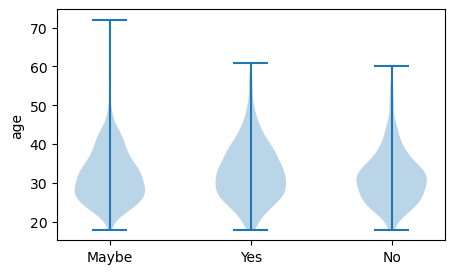

In [86]:
#correlation between age and mental_health_consequence
plt.figure(figsize = (5,3))

dataset = [df[df['mental_health_consequence']=='Maybe']['Age'].values,
           df[df['mental_health_consequence']=='Yes']['Age'].values,
          df[df['mental_health_consequence' ]=='No']['Age'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2,3],['Maybe','Yes','No'])
plt.ylabel('age')
plt.show()

<Figure size 500x300 with 0 Axes>

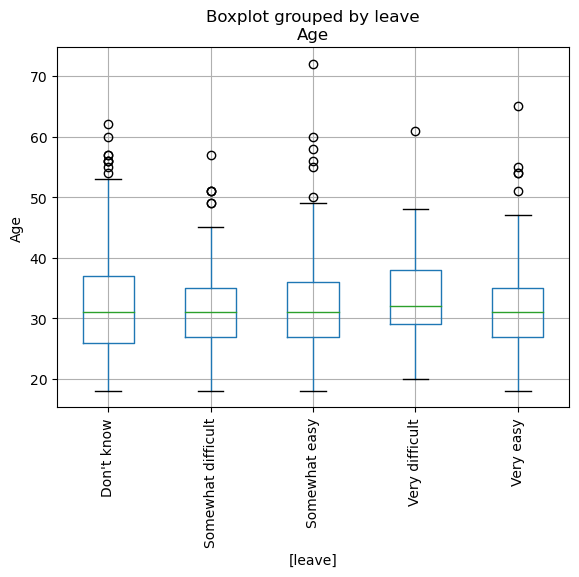

In [88]:
#correlation between age and leave
plt.figure(figsize = (5,3))
df[['Age','leave']].boxplot(by='leave')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.show()